# Trading the gap

## 1.Introducción

El objetivo es analizar la componente predictiva asociada a la formación de gaps entre sesiones de diferentes mercados financieros, en este caso en el mercado de futuros del CME

## 2.Dataset

Exportamos desde Multicharts (con datafeed de Tradestation) un fichero de datos OHLCV en timeframe de 15m de un ticker del mercado de futuros del CME, en este caso el "CL", Crude Oil Futures. El objetivo es obtener una distribución del volumen de la sesion por tramos horarios 

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

path=r"C:\Users\danie\Documents\Buscar curro\BBK Data Science Bootcamp\proyectos\Proyecto ML\data"

df= pd.read_csv(path+"\\"+"CL_15M_exchange.txt")

df


,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>
0,1/2/2006,19:15:00,136.10,136.24,135.87,136.10,889
1,1/2/2006,19:30:00,136.10,136.50,136.10,136.50,537
2,1/2/2006,19:45:00,136.49,136.66,136.49,136.56,514
3,1/2/2006,20:00:00,136.58,136.61,136.52,136.52,274
4,1/2/2006,20:15:00,136.51,136.63,136.51,136.52,190
...,...,...,...,...,...,...,...
428241,5/17/2024,16:00:00,79.57,79.57,79.51,79.53,1016
428242,5/17/2024,16:15:00,79.53,79.54,79.48,79.49,627
428243,5/17/2024,16:30:00,79.50,79.52,79.49,79.52,214
428244,5/17/2024,16:45:00,79.51,79.53,79.49,79.52,312


In [35]:
df.describe()

,<Open>,<High>,<Low>,<Close>,<Volume>
count,428246.000000,428246.000000,428246.000000,428246.000000,428246.000000
mean,86.688931,86.787753,86.587992,86.688620,3017.983164
std,37.228533,37.241244,37.215743,37.228348,5018.698331
min,-4.890000,-3.980000,-7.850000,-4.890000,1.000000
25%,52.140000,52.220000,52.070000,52.140000,277.000000
50%,89.690000,89.840000,89.550000,89.690000,1040.000000
75%,113.037500,113.140000,112.930000,113.030000,3748.000000
max,207.470000,207.660000,206.790000,207.450000,173192.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428246 entries, 0 to 428245
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   <Date>     428246 non-null  object 
 1    <Time>    428246 non-null  object 
 2    <Open>    428246 non-null  float64
 3    <High>    428246 non-null  float64
 4    <Low>     428246 non-null  float64
 5    <Close>   428246 non-null  float64
 6    <Volume>  428246 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 22.9+ MB


In [37]:
df.columns


Index(['<Date>', ' <Time>', ' <Open>', ' <High>', ' <Low>', ' <Close>',
       ' <Volume>'],
      dtype='object')

Como puede verse, los datos del fichero OHLCV en 15m vienen muy limpios. Ello se debe a que son datos del mercado de futuros del CME, por los cuales se paga una suscripción mensual. No es necesario, por tanto, hacer una limpieza de datos

Creamos un histograma del volumen del activo por hora

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\1976740148.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df[' <Time>']).dt.hour


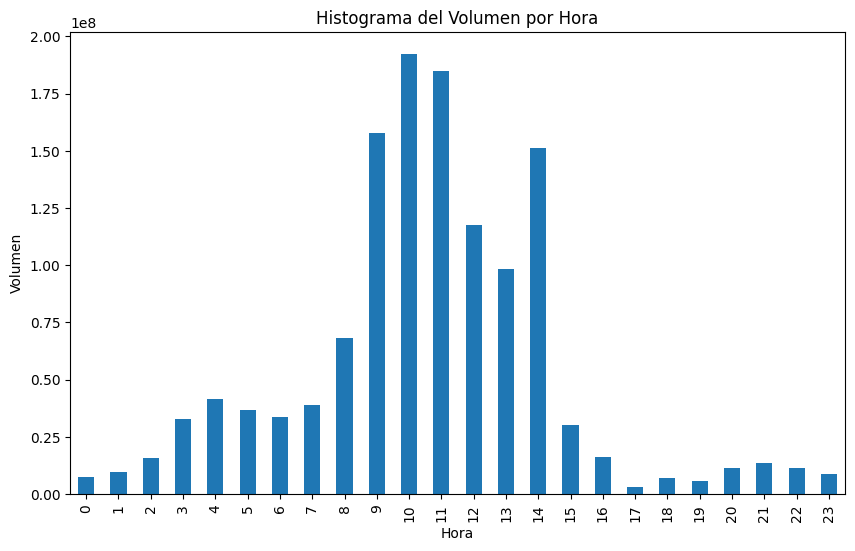

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Extraer la hora de la columna "Time"
df['Hour'] = pd.to_datetime(df[' <Time>']).dt.hour

# Agrupar por hora y calcular la suma del volumen
grouped_df = df.groupby(['Hour'])[' <Volume>'].sum()

# Crear el histograma
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hora')
plt.ylabel('Volumen')
plt.title('Histograma del Volumen por Hora')

# Amplía el eje X para ver mejor los valores
#plt.xlim(df['Volume'].min(), df['Volume'].max())
plt.show()

Para verlo de forma más detallada, creamos un histograma del volumen del activo por hora, en fracciones de 15m

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\1542223882.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df[' <Time>']).dt.hour
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\1542223882.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df[' <Time>']).dt.minute


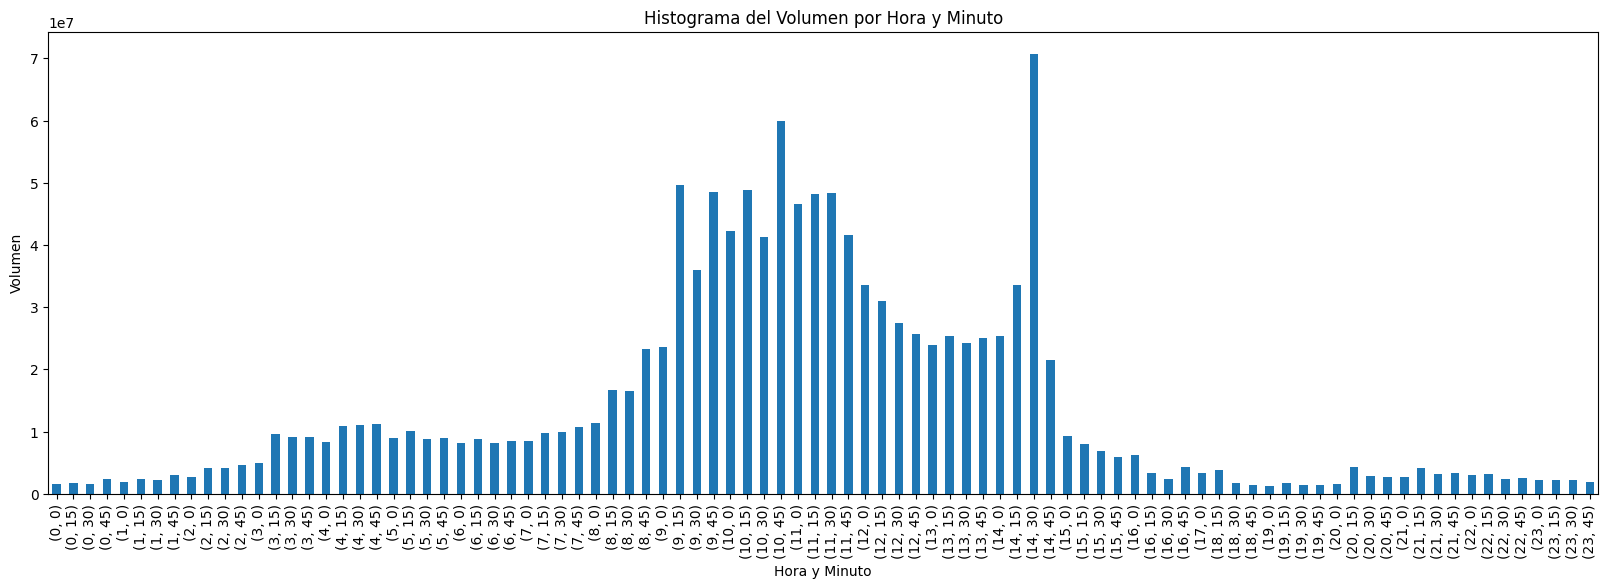

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Extraer la hora y el minuto de la columna "Time"
df['Hour'] = pd.to_datetime(df[' <Time>']).dt.hour
df['Minute'] = pd.to_datetime(df[' <Time>']).dt.minute

# Agrupar por hora y minuto y calcular la suma del volumen
grouped_df = df.groupby(['Hour', 'Minute'])[' <Volume>'].sum()

# Crear el histograma
grouped_df.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Hora y Minuto')
plt.ylabel('Volumen')
plt.title('Histograma del Volumen por Hora y Minuto')

# Amplía el eje X para ver mejor los valores
#plt.xlim(df['Volume'].min(), df['Volume'].max())
plt.show()

Con datos desde 2006 hasta la actualidad, parece claro que el grueso del volumen negociado se distribuye entre las 0800h y las 1500h, lo que coincide con la sesión al contado o spot. Ahora necesitamos comprobar si esta distribución del volumen es estable a lo largo del tiempo y se mantiene en los últimos años: 2023 y 2024. De esta manera, volvemos a repetir el análisis de la distribución del volumen mediante el histograma para los años 2023 y 2024

Creamos un histograma del volumen del activo por hora para el último año (2024)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\950577234.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['Hour'] = pd.to_datetime(df_filtered[' <Time>']).dt.hour
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\950577234.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = pd.to_datetime(df_filtered[' <Time>']).dt.hour


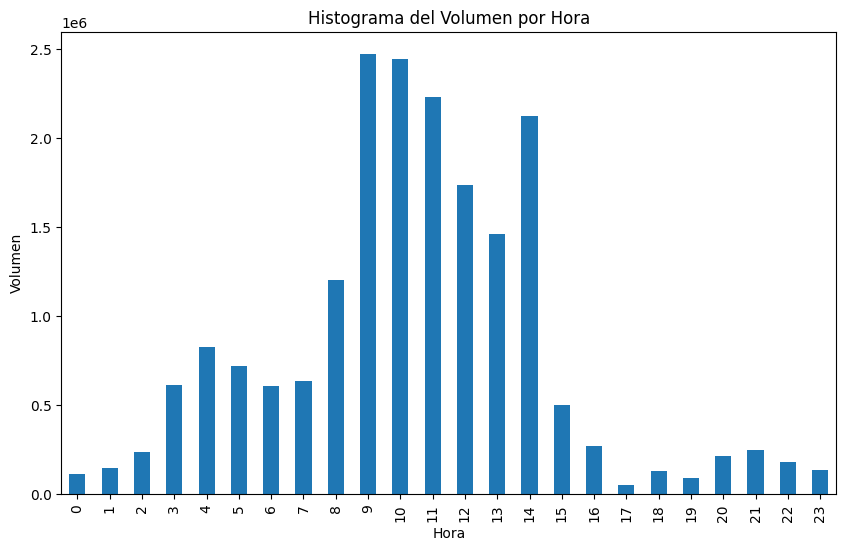

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer la hora y el minuto de la columna "Time"
# Asegúrate de que la columna 'Date' sea de tipo datetime
df['<Date>'] = pd.to_datetime(df['<Date>'])

#filtro el dataframe para los años que quiera
df_filtered=df[df['<Date>'].dt.year >= 2024]

# Extraer la hora de la columna "Time"
df_filtered['Hour'] = pd.to_datetime(df_filtered[' <Time>']).dt.hour

# Agrupar por hora y calcular la suma del volumen
grouped_df = df_filtered.groupby(['Hour'])[' <Volume>'].sum()

# Crear el histograma
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hora')
plt.ylabel('Volumen')
plt.title('Histograma del Volumen por Hora')

# Amplía el eje X para ver mejor los valores
#plt.xlim(df['Volume'].min(), df['Volume'].max())
plt.show()

Para verlo de forma más detallada, creamos un histograma del volumen del activo por hora, en fracciones de 15m para el último año (2024)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\1620966614.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df[' <Time>']).dt.hour
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16664\1620966614.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df[' <Time>']).dt.minute


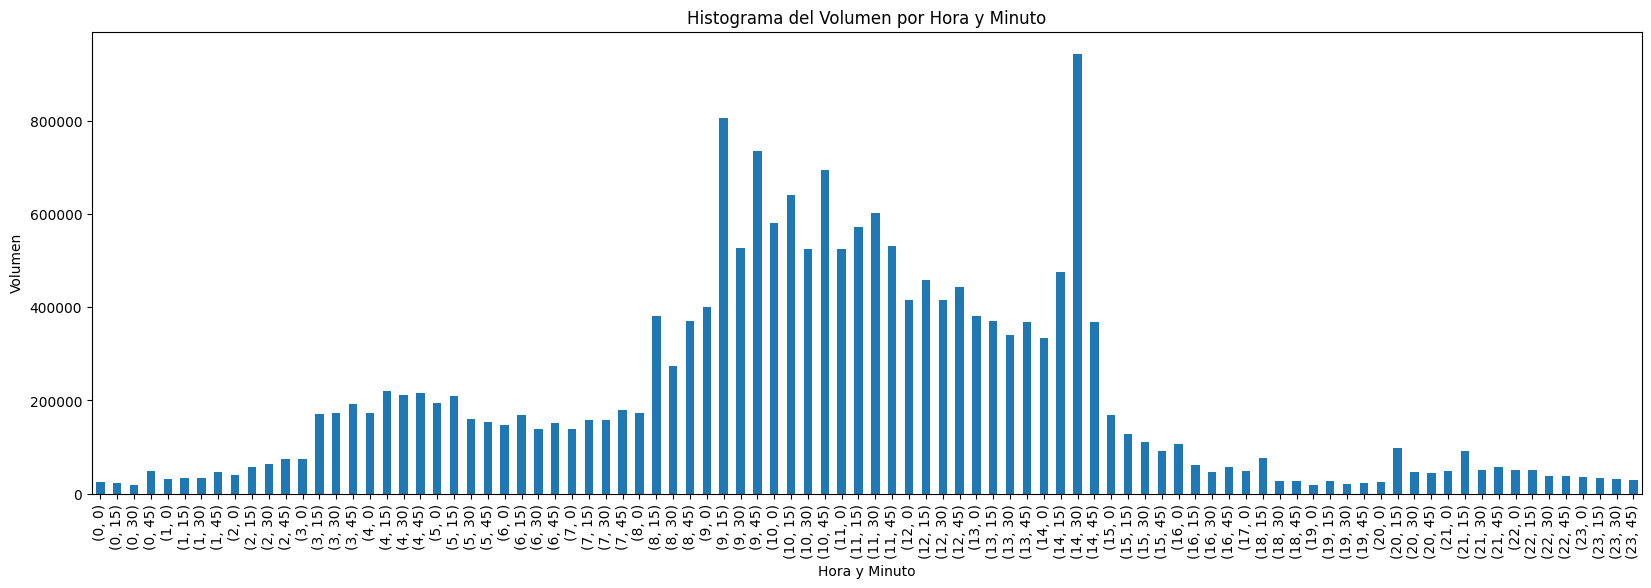

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer la hora y el minuto de la columna "Time"
df['Hour'] = pd.to_datetime(df[' <Time>']).dt.hour
df['Minute'] = pd.to_datetime(df[' <Time>']).dt.minute

# Asegúrate de que la columna 'Date' sea de tipo datetime
df['<Date>'] = pd.to_datetime(df['<Date>'])

#filtro el dataframe para los años que quiera
df_filtered=df[df['<Date>'].dt.year >= 2024]

# Agrupar por hora y minuto y calcular la suma del volumen
grouped_df = df_filtered.groupby(['Hour', 'Minute'])[' <Volume>'].sum()

# Crear el histograma
grouped_df.plot(kind='bar', figsize=(20, 6))
plt.xlabel('Hora y Minuto')
plt.ylabel('Volumen')
plt.title('Histograma del Volumen por Hora y Minuto')

# Amplía el eje X para ver mejor los valores
#plt.xlim(df['Volume'].min(), df['Volume'].max())
plt.show()

In [42]:
df_filtered

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,Hour,Minute
420092,2024-01-01,18:15:00,71.71,72.28,71.63,72.03,2280,18,15
420093,2024-01-01,18:30:00,72.02,72.03,71.94,71.98,567,18,30
420094,2024-01-01,18:45:00,71.97,71.98,71.86,71.90,278,18,45
420095,2024-01-01,19:00:00,71.89,71.97,71.86,71.96,172,19,0
420096,2024-01-01,19:15:00,71.95,72.04,71.94,72.01,287,19,15
...,...,...,...,...,...,...,...,...,...
428241,2024-05-17,16:00:00,79.57,79.57,79.51,79.53,1016,16,0
428242,2024-05-17,16:15:00,79.53,79.54,79.48,79.49,627,16,15
428243,2024-05-17,16:30:00,79.50,79.52,79.49,79.52,214,16,30
428244,2024-05-17,16:45:00,79.51,79.53,79.49,79.52,312,16,45


Con datos recientes de este año 2024, vemos comprobamos que el grueso del volumen negociado se distribuye entre las 0800h y las 1500h, luego los horarios de mayor negociación permanecen estables.Ahora debemos crear una sesión "custom" de 0800h a 1500h en timeframe de 1440 minutos (1 día) para quedarnos con los OHLCV de esa franja horaria. Se crearán unos gaps entre el cierre y la apertura de la sesión

In [43]:
import pandas_ta as ta

path=r"C:\Users\danie\Documents\Buscar curro\BBK Data Science Bootcamp\proyectos\Proyecto ML\data"

df= pd.read_csv(path+"\\"+"CL 1440M_exchange.txt")

df

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>
0,1/3/2006,15:00:00,133.01,133.41,132.98,133.28,2574
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132
...,...,...,...,...,...,...,...
4730,5/15/2024,15:00:00,77.12,78.31,76.21,78.26,133844
4731,5/16/2024,15:00:00,78.24,79.36,78.07,78.87,79883
4732,5/17/2024,15:00:00,78.77,79.64,78.68,79.62,119751
4733,5/20/2024,15:00:00,79.34,80.11,78.67,79.29,143626


## 3.Preprocesamiento de los datos

Añado la columna "EXISTE_GAP" que me dice si existe gap (1) o no (0)

In [44]:

df['EXISTE_GAP'] = ((df[' <Close>'].shift(1) < df[' <Open>']) | (df[' <Close>'].shift(1) > df[' <Open>'])).astype(int)

# Ahora el DataFrame "df" tiene la nueva columna "EXISTE_GAP"
df.describe()



,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP
count,4735.000000,4735.000000,4735.000000,4735.000000,4.735000e+03,4735.000000
mean,83.391288,84.255326,82.442971,83.370372,2.048378e+05,0.993031
std,37.431820,37.562759,37.256778,37.421082,1.193767e+05,0.083200
min,-7.610000,-4.580000,-11.770000,-6.580000,4.740000e+02,0.000000
25%,48.545000,49.245000,47.930000,48.460000,1.304485e+05,1.000000
50%,87.220000,88.650000,85.620000,87.150000,1.762810e+05,1.000000
75%,109.560000,110.360000,108.520000,109.595000,2.598965e+05,1.000000
max,203.230000,204.160000,200.590000,202.220000,1.093154e+06,1.000000


Vemos que solo hay unas pocas observaciones en las que no existe gap. Lo habitual es que haya gap, de mayor o menor tamaño

In [45]:
df_existe_gap_0 = df[df['EXISTE_GAP'] == 0]

df_existe_gap_0

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP
0,1/3/2006,15:00:00,133.01,133.41,132.98,133.28,2574,0
276,2/5/2007,15:00:00,115.61,116.57,115.08,115.32,125963,0
299,3/8/2007,15:00:00,117.98,118.45,117.35,117.74,94790,0
373,6/22/2007,15:00:00,119.46,120.36,119.21,120.00,107933,0
393,7/20/2007,15:00:00,126.63,126.91,126.03,126.41,80781,0
431,9/12/2007,15:00:00,129.02,130.95,128.81,130.45,128042,0
443,9/28/2007,15:00:00,135.04,135.81,133.50,133.71,152607,0
989,11/10/2009,15:00:00,112.26,113.37,110.75,111.87,219957,0
1132,6/2/2010,15:00:00,97.80,99.09,96.96,98.48,221344,0
1265,12/6/2010,15:00:00,110.04,110.42,109.40,110.11,141858,0


Elimino aquellas filas en las que el valor EXISTE_GAP=0 (no existe gap)

In [46]:
# Obtenemos los índices para las filas donde 'EXISTE_GAP' sea igual a 0
indexNames = df[df['EXISTE_GAP'] == 0].index

# Eliminamos las filas con los índices encontrados
df.drop(indexNames, inplace=True)


df_existe_gap_0 = df[df['EXISTE_GAP'] == 0]

df_existe_gap_0



,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP


Añado la columna "ATR_5" que me indica el ATR de 5 días (podría indicar otro número de días)


In [47]:
df['ATR_5'] = ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=5)

df.head(20)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489


Añado la columna "GAP_SIZE" donde calculo el tamaño del hueco normalizado por ATR a volatilidad constante: Abs(Cierre-Open) / ATR_5

In [48]:
df['GAP_SIZE']=abs(df[' <Close>'].shift(1) - df[' <Open>']) / df['ATR_5'].shift(1)

df.head(20)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187


Añado la columna "GAPUP_DOWN" que me indica si el gap es alcista (1) o bajista (0)

In [49]:
df['GAPUP_DOWN'] = (df[' <Close>'].shift(1) < df[' <Open>']).astype(int)

df


,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,GAPUP_DOWN
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,0
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,1
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,1
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,1
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4730,5/15/2024,15:00:00,77.12,78.31,76.21,78.26,133844,1,1.644977,0.287352,0
4731,5/16/2024,15:00:00,78.24,79.36,78.07,78.87,79883,1,1.573982,0.012158,0
4732,5/17/2024,15:00:00,78.77,79.64,78.68,79.62,119751,1,1.451186,0.063533,0
4733,5/20/2024,15:00:00,79.34,80.11,78.67,79.29,143626,1,1.448948,0.192946,0


Añado la columna "GAP_INSIDE_BODY", que me indica si el gap está (abre) dentro del cuerpo de la vela (1) o no (0)

In [50]:
df['GAP_INSIDE_BODY'] = ((df[[' <Close>', ' <Open>']].shift(1).min(axis=1) < df[' <Open>']) & (df[[' <Close>', ' <Open>']].shift(1).max(axis=1) > df[' <Open>'])).astype(int)



df.head(60)



,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,GAPUP_DOWN,GAP_INSIDE_BODY
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,0,0
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,1,0
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,1,0
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,1,0
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,0,0
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,0,0
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,1,0
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,0,0
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,1,0
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,1,0


Añado la columna "GAP_INSIDE_CANDLE", que me indica si el gap está (abre) dentro de la vela (incluyendo sus Max y Min) (1) o no (0)

In [51]:
df['GAP_INSIDE_CANDLE'] = ((df[' <Low>'].shift(1) < df[' <Open>']) & (df[' <High>'].shift(1) > df[' <Open>'])).astype(int)

df.head(60)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,GAPUP_DOWN,GAP_INSIDE_BODY,GAP_INSIDE_CANDLE
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,0,0,0
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,1,0,0
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,1,0,0
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,1,0,0
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,0,0,0
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,0,0,0
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,1,0,0
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,0,0,0
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,1,0,0
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,1,0,0


Añado la columna "DFUT_CIERRAHUECO". Es un dato que "mira al futuro" (cosas que han pasado en la sesión del día de hoy) y me dice si se cerrará o no el hueco. Miro si abre hacia arriba o hacia abajo.Si abre hacia abajo pido que el max de la vela supere el cierre anterior.Lo utilizaré en el árbol de decisión para predecir esta columna haciendo el data-mining, que me dirá si ha cerrado o no el precio


In [52]:
df['DFUT_CIERRAHUECO'] = ( (df[[' <Close>']].shift(1).min(axis=1) > df[' <Open>']) & (df[[' <Close>']].shift(1).max(axis=1) < df[' <High>']) & (df[[' <Close>']].shift(1).max(axis=1) > df[' <Low>'])  ).astype(int)

df.head(60)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,GAPUP_DOWN,GAP_INSIDE_BODY,GAP_INSIDE_CANDLE,DFUT_CIERRAHUECO
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,0,0,0,0
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,1,0,0,0
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,1,0,0,0
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,1,0,0,0
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,0,0,0,0
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,0,0,0,0
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,1,0,0,0
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,0,0,0,0
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,1,0,0,0
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,1,0,0,0


Añado columnas del ROC (Rate Of Change) del Close en diferentes ventanas temporales

In [53]:
df['ROC1'] = ta.roc(df[' <Close>'], length=1)
df['ROC4'] = ta.roc(df[' <Close>'], length=4)
df['ROC12'] = ta.roc(df[' <Close>'], length=12)
df['ROC52'] = ta.roc(df[' <Close>'], length=52)


df.head(60)


,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,GAPUP_DOWN,GAP_INSIDE_BODY,GAP_INSIDE_CANDLE,DFUT_CIERRAHUECO,ROC1,ROC4,ROC12,ROC52
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,1,0,0,0,0.469414,NaN,NaN,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,1,0,0,0,0.074162,NaN,NaN,NaN
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,1,0,0,0,0.585445,NaN,NaN,NaN
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,0,0,0,0,-0.243130,0.886670,NaN,NaN
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,0,0,0,0,-0.435746,-0.022249,NaN,NaN
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,1,0,0,0,1.016245,0.918927,NaN,NaN
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,0,0,0,0,-0.859157,-0.530465,NaN,NaN
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,1,0,0,0,1.348048,1.056130,NaN,NaN
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,1,0,0,0,0.898926,2.410800,NaN,NaN


Añado columnas del MA (Moving Average) del Close en diferentes ventanas temporales.Calcula la relación entre el precio de cierre actual y la SMA de X períodos 

In [54]:
df['MA4'] = df[' <Close>'] / ta.sma(df[' <Close>'], length=4) 
df['MA12'] = df[' <Close>'] / ta.sma(df[' <Close>'], length=12) 
df['MA52'] = df[' <Close>'] / ta.sma(df[' <Close>'], length=52) 

df.head(60)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,...,GAP_INSIDE_BODY,GAP_INSIDE_CANDLE,DFUT_CIERRAHUECO,ROC1,ROC4,ROC12,ROC52,MA4,MA12,MA52
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,...,0,0,0,0.469414,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,...,0,0,0,0.074162,NaN,NaN,NaN,NaN,NaN,NaN
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,...,0,0,0,0.585445,NaN,NaN,NaN,1.005929,NaN,NaN
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,...,0,0,0,-0.243130,0.886670,NaN,NaN,1.001276,NaN,NaN
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,...,0,0,0,-0.435746,-0.022249,NaN,NaN,0.996968,NaN,NaN
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,...,0,0,0,1.016245,0.918927,NaN,NaN,1.004796,NaN,NaN
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,...,0,0,0,-0.859157,-0.530465,NaN,NaN,0.997488,NaN,NaN
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,...,0,0,0,1.348048,1.056130,NaN,NaN,1.008271,NaN,NaN
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,...,0,0,0,0.898926,2.410800,NaN,NaN,1.011280,NaN,NaN


Añado columnas en unidades de volatilidad (ATR - Average True Range) en diferentes ventanas temporales

In [55]:
df['VOLAT_CPLAZO'] = ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=3) / ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=5)
df['VOLAT_LPLAZO'] = ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=3) / ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=12)
df['VOLATB_LPLAZO'] = ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=5) / ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=12)
df['VOLATC_LPLAZO'] = ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=12) / ta.atr(df[' <High>'], df[' <Low>'], df[' <Close>'], length=52)

df.head(60)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,...,ROC4,ROC12,ROC52,MA4,MA12,MA52,VOLAT_CPLAZO,VOLAT_LPLAZO,VOLATB_LPLAZO,VOLATC_LPLAZO
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,...,NaN,NaN,NaN,1.005929,NaN,NaN,NaN,NaN,NaN,NaN
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,...,0.886670,NaN,NaN,1.001276,NaN,NaN,NaN,NaN,NaN,NaN
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,...,-0.022249,NaN,NaN,0.996968,NaN,NaN,1.011692,NaN,NaN,NaN
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,...,0.918927,NaN,NaN,1.004796,NaN,NaN,1.093567,NaN,NaN,NaN
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,...,-0.530465,NaN,NaN,0.997488,NaN,NaN,1.108068,NaN,NaN,NaN
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,...,1.056130,NaN,NaN,1.008271,NaN,NaN,1.128576,NaN,NaN,NaN
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,...,2.410800,NaN,NaN,1.011280,NaN,NaN,1.106996,NaN,NaN,NaN


Añado columnas con un oscilador, el RSI

In [56]:
df['RSI2'] = ta.rsi(df[' <Close>'], length=2)
df['RSI3'] = ta.rsi(df[' <Close>'], length=3)
df['RSI5'] = ta.rsi(df[' <Close>'], length=5)
df['RSI12'] = ta.rsi(df[' <Close>'], length=12)

df.head(60)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,...,MA12,MA52,VOLAT_CPLAZO,VOLAT_LPLAZO,VOLATB_LPLAZO,VOLATC_LPLAZO,RSI2,RSI3,RSI5,RSI12
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.180995,69.662921,NaN,NaN
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,...,NaN,NaN,1.011692,NaN,NaN,NaN,24.828874,38.411715,48.826975,NaN
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,...,NaN,NaN,1.093567,NaN,NaN,NaN,79.836421,75.965712,74.743800,NaN
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,...,NaN,NaN,1.108068,NaN,NaN,NaN,35.484828,42.650666,48.514466,NaN
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,...,NaN,NaN,1.128576,NaN,NaN,NaN,76.353501,71.655434,69.396670,NaN
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,...,NaN,NaN,1.106996,NaN,NaN,NaN,87.261035,81.262308,77.206557,NaN


Añadimos otra columna con un oscilador restando la media al cierre y dividiendo entre la volatilidad (StDev)

In [57]:
df['TIP3'] = df[' <Close>'] - ta.sma(df[' <Close>'], length=3) / ta.stdev(df[' <Close>'], length=3)


df.head(60)

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,EXISTE_GAP,ATR_5,GAP_SIZE,...,MA52,VOLAT_CPLAZO,VOLAT_LPLAZO,VOLATB_LPLAZO,VOLATC_LPLAZO,RSI2,RSI3,RSI5,RSI12,TIP3
1,1/4/2006,15:00:00,133.84,134.22,133.84,134.21,2465,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/2006,15:00:00,134.82,134.90,134.75,134.84,1180,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/6/2006,15:00:00,135.04,135.05,134.77,134.94,1755,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,-205.317154
4,1/9/2006,15:00:00,136.06,136.10,135.72,135.73,1132,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN,-141.516277
5,1/10/2006,15:00:00,135.60,135.61,135.30,135.40,1261,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.180995,69.662921,NaN,NaN,-205.738948
6,1/11/2006,15:00:00,134.79,134.84,134.64,134.81,1193,1,0.675983,NaN,...,NaN,1.011692,NaN,NaN,NaN,24.828874,38.411715,48.826975,NaN,-155.510270
7,1/12/2006,15:00:00,136.10,136.33,136.03,136.18,1439,1,0.904758,1.908332,...,NaN,1.093567,NaN,NaN,NaN,79.836421,75.965712,74.743800,NaN,-60.945786
8,1/13/2006,15:00:00,135.04,135.08,134.69,135.01,3638,1,1.052867,1.260005,...,NaN,1.108068,NaN,NaN,NaN,35.484828,42.650666,48.514466,NaN,-47.867317
9,1/17/2006,15:00:00,136.75,136.87,136.69,136.83,963,1,1.246837,1.652630,...,NaN,1.128576,NaN,NaN,NaN,76.353501,71.655434,69.396670,NaN,-10.635015
10,1/18/2006,15:00:00,138.40,138.40,137.83,138.06,1577,1,1.321489,1.259187,...,NaN,1.106996,NaN,NaN,NaN,87.261035,81.262308,77.206557,NaN,49.017977


Ahora hemos generado todas las features y el target en el dataset. Debemos hacer una limpieza de datos para alimentar correctamente al modelo, que será un clasificador

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4702 entries, 1 to 4734
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   <Date>             4702 non-null   object 
 1    <Time>            4702 non-null   object 
 2    <Open>            4702 non-null   float64
 3    <High>            4702 non-null   float64
 4    <Low>             4702 non-null   float64
 5    <Close>           4702 non-null   float64
 6    <Volume>          4702 non-null   int64  
 7   EXISTE_GAP         4702 non-null   int32  
 8   ATR_5              4697 non-null   float64
 9   GAP_SIZE           4696 non-null   float64
 10  GAPUP_DOWN         4702 non-null   int32  
 11  GAP_INSIDE_BODY    4702 non-null   int32  
 12  GAP_INSIDE_CANDLE  4702 non-null   int32  
 13  DFUT_CIERRAHUECO   4702 non-null   int32  
 14  ROC1               4701 non-null   float64
 15  ROC4               4698 non-null   float64
 16  ROC12              4690 non-n

Vemos que tenemos columnas con valores nulos, los cuales eliminaremos

In [59]:
df.dropna(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4650 entries, 53 to 4734
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   <Date>             4650 non-null   object 
 1    <Time>            4650 non-null   object 
 2    <Open>            4650 non-null   float64
 3    <High>            4650 non-null   float64
 4    <Low>             4650 non-null   float64
 5    <Close>           4650 non-null   float64
 6    <Volume>          4650 non-null   int64  
 7   EXISTE_GAP         4650 non-null   int32  
 8   ATR_5              4650 non-null   float64
 9   GAP_SIZE           4650 non-null   float64
 10  GAPUP_DOWN         4650 non-null   int32  
 11  GAP_INSIDE_BODY    4650 non-null   int32  
 12  GAP_INSIDE_CANDLE  4650 non-null   int32  
 13  DFUT_CIERRAHUECO   4650 non-null   int32  
 14  ROC1               4650 non-null   float64
 15  ROC4               4650 non-null   float64
 16  ROC12              4650 non-

## 4.Modelado

Separo las columnas del dataset en features (X) y target (y)

In [61]:
X = df.drop(columns=['<Date>',' <Time>',' <Open>',' <High>',' <Low>',' <Close>',' <Volume>','DFUT_CIERRAHUECO','EXISTE_GAP'])
y = df['DFUT_CIERRAHUECO']

Divido los datos en Train y Test

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hago un análisis "Feature Importance" mediante un RandomForest

In [63]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

names = X.columns
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.4225,GAPUP_DOWN
1,0.2579,ROC1
2,0.1017,GAP_SIZE
3,0.0190,ATR_5
4,0.0188,TIP3
5,0.0177,VOLATC_LPLAZO
6,0.0169,ROC52
7,0.0157,VOLAT_CPLAZO
8,0.0155,ROC12
9,0.0144,ROC4


Hago un análisis Feature Importance Estadístico

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression

print(X.shape)
sel = SelectKBest(f_regression, k=5)
X_new = sel.fit_transform(X, y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

(4650, 21)
(4650, 5)
[4.00235737e+00 2.93172845e+02 3.38705221e+03 3.89829723e+01
 1.55051219e+02 1.13156180e-03 3.79680449e-02 8.97494104e-02
 2.89722707e+00 6.19943336e+00 1.49338738e-01 3.10295679e+00
 3.51763965e+01 2.94826392e+01 1.96843397e+01 4.89128981e+00
 3.26742802e+00 5.79480232e+00 7.70104664e+00 5.88558611e+00
 1.85037285e+01]


,column,score
2,GAPUP_DOWN,3387.052212
1,GAP_SIZE,293.172845
4,GAP_INSIDE_CANDLE,155.051219
3,GAP_INSIDE_BODY,38.982972
12,VOLAT_CPLAZO,35.176397
13,VOLAT_LPLAZO,29.482639
14,VOLATB_LPLAZO,19.684340
20,TIP3,18.503728
18,RSI5,7.701047
9,MA4,6.199433


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


estimator = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5], 'min_samples_split': [4, 6, 8], 'min_samples_leaf': [4, 6, 8]}
gsc = GridSearchCV(estimator= estimator, param_grid= param_grid, scoring= 'accuracy', cv = 5)

gsc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [4, 6, 8]},
             scoring='accuracy')

In [66]:
from sklearn.metrics import accuracy_score

print('Train:')
print('Acc:', accuracy_score(y_train, gsc.best_estimator_.predict(X_train)))

print('\n')

print('Test:')
print('Acc:', accuracy_score(y_test, gsc.best_estimator_.predict(X_test)))

Train:
Acc: 0.932258064516129


Test:
Acc: 0.9075268817204301


In [67]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

# 5.Predicción y resultados finales

In [68]:
gsc.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=6)

[Text(0.5446428571428571, 0.9166666666666666, 'GAPUP_DOWN <= 0.5\ngini = 0.404\nsamples = 3720\nvalue = [2676, 1044]'),
 Text(0.5089285714285714, 0.75, 'ROC1 <= -0.485\ngini = 0.484\nsamples = 1774\nvalue = [730, 1044]'),
 Text(0.2857142857142857, 0.5833333333333334, 'GAP_SIZE <= 0.256\ngini = 0.437\nsamples = 1000\nvalue = [677, 323]'),
 Text(0.14285714285714285, 0.4166666666666667, 'GAP_SIZE <= 0.174\ngini = 0.478\nsamples = 395\nvalue = [156, 239]'),
 Text(0.07142857142857142, 0.25, 'ROC1 <= -5.368\ngini = 0.428\nsamples = 248\nvalue = [77, 171]'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.405\nsamples = 234\nvalue = [66, 168]'),
 Text(0.21428571428571427, 0.25, 'ROC1 <= -1.941\ngini = 0.497\nsamples = 147\nvalue = [79, 68]'),
 Text(0.17857142857142858, 0.08333333333333333, 'gini = 0.401\nsamples = 54\nvalue = [39, 15]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.49\nsamp

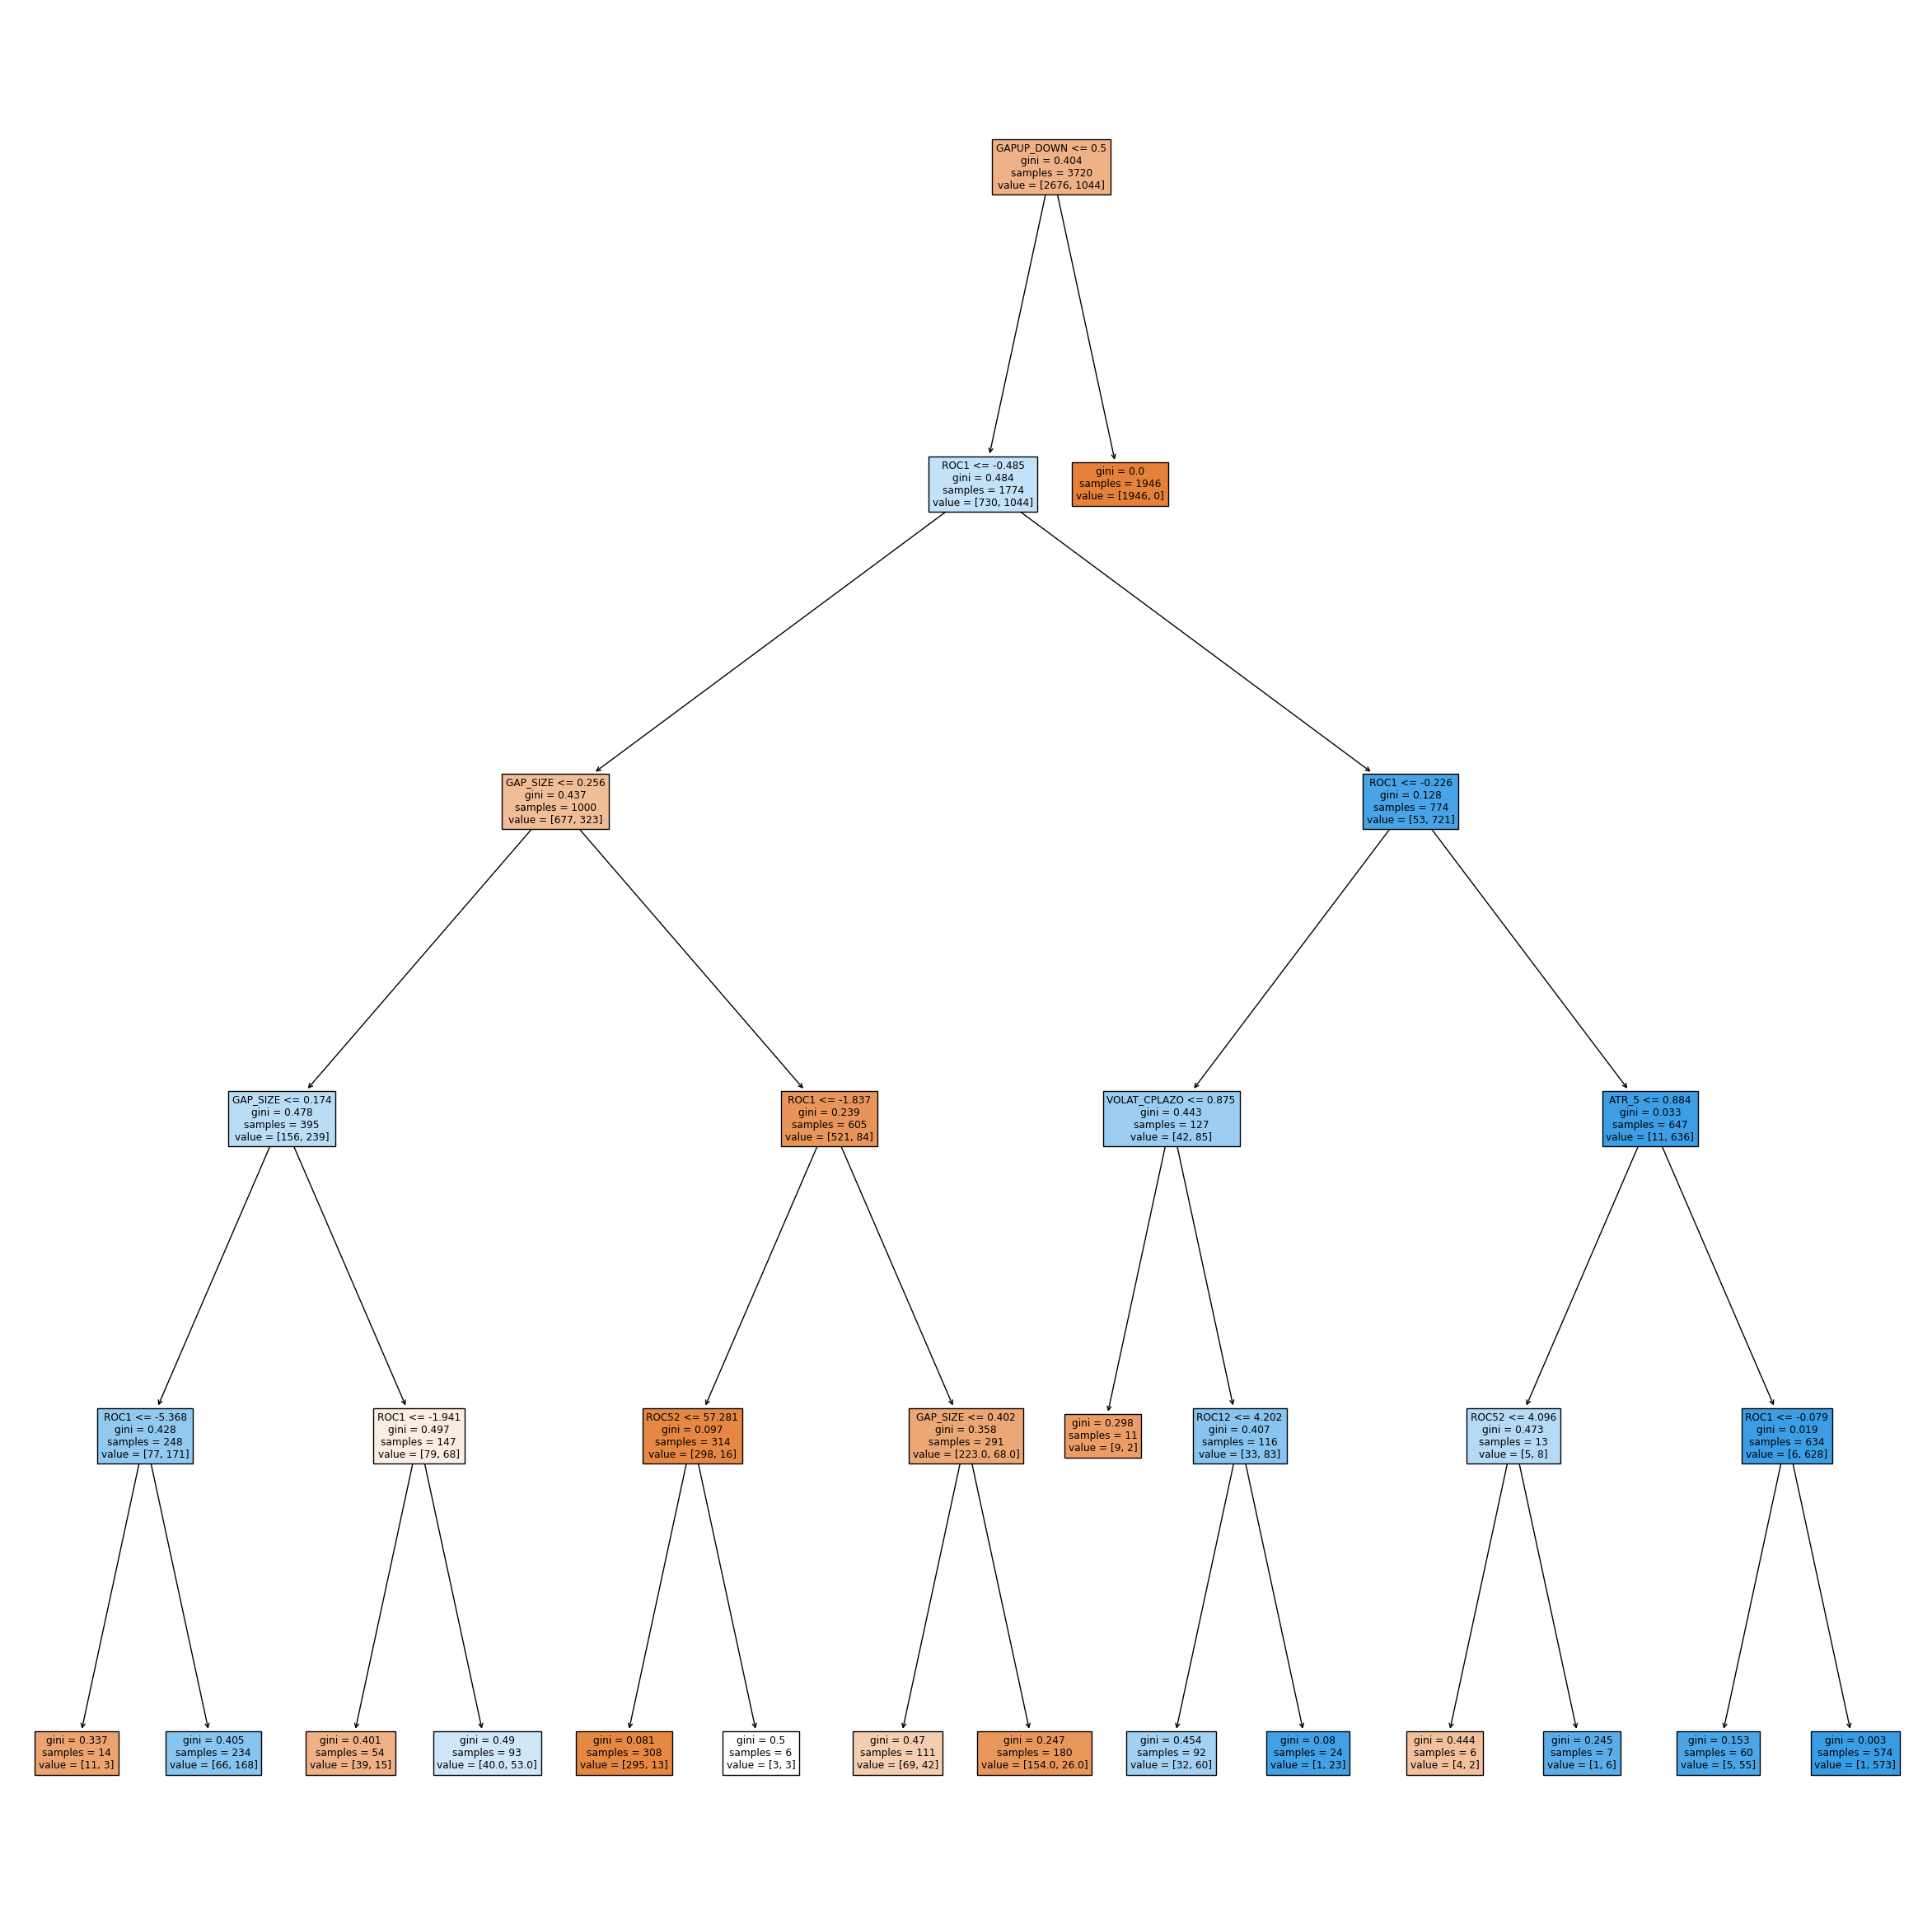

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(gsc.best_estimator_, feature_names=X_train.columns, filled=True)



# 6.Conclusiones y futuros pasos

* Análisis de los resultados y fortalezas/debilidades del proyecto:
    
    1. Los features que más importancia tienen en la clasificación son: GAPUP_DOWN, ROC1, GAP_SIZE, GAP_INSIDE_CANDLE
    2. Como fortaleza, señalar que la obtención de una serie de reglas discretas para implementar un sistema de trading, ofrece trazabilidad a diferencia de otros modelos de tipo "black box"
    3. Como debilidad, una aproximación de este tipo es estática, y no tiene ninguna componente dinámica que permita adaptarse a las variaciones del mercado
* Como futuros pasos se plantea el ampliar el estudio a nuevos y diferentes mercados. El objetivo final sería implementar un sistema de trading basado en reglas discretas, que son las obtenidas mediante el Decision Tree

